##### Module import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tableone import TableOne
from forestplot import forestplot

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data import

In [3]:
print(os.getcwd())

c:\Users\Owner\Desktop\윤태준\고용패널\고용패널 파이썬 분석\2023_04_06_변수추가\변수추가


In [4]:
df = pd.read_csv('2023_04_10_data_step.csv', encoding='cp949')
df.columns

Index(['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a038', 'a039',
       ...
       'big_companyG', 'work_satiG', 'company_satiG', 'supply', 'insurance',
       '주당근로일', '주당근로시간', '직장에서의복리후생제공여부', '보험가입여부', '직장만족도'],
      dtype='object', length=106)

In [5]:
df_1 = df.copy()

###### full 로지스틱 

In [6]:
model = sm.Logit.from_formula('''LongWork2 ~ 주당근로일 + 주당근로시간
    + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(직장만족도,Treatment('그렇지않다')) + C(보험가입여부,Treatment('가입하지않음'))''', df_1).fit()
print('==================================Model Summary=========================================')
model.summary()

Optimization terminated successfully.
         Current function value: 0.520133
         Iterations 6
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 5808
Model:                          Logit   Df Residuals:                     5801
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                  0.1034
Time:                        20:09:04   Log-Likelihood:                -3020.9
converged:                       True   LL-Null:                       -3369.4
Covariance Type:            nonrobust   LLR p-value:                2.913e-147
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -3.2877      0.209    -15.741      0.000      -3.697      -2.878
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.9087      0.071     12.759      0.000       0.769       1.048
C(직장만족도, Treatment('그렇지않다'))[T.그렇다]                1.2584      0.095     13.304      0.000       1.073       1.444
C(직장만족도, Treatment('그렇지않다'))[T.보통이다]               0.5867      0.099      5.945      0.000       0.393       0.780
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.4706      0.072      6.521      0.000       0.329       0.612
주당근로일                                             -0.0509      0.057     -0.899      0.369      -0.162       0.060
주당근로시간                                             0.0319      0.005      6.896      0.000       0.023       0.041
==================================================================================================================
"""

In [8]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.037339,0.024795,0.056227
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.481013,2.157781,2.852664
"C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",3.519785,2.924169,4.236719
"C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",1.798068,1.481818,2.181812
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.600951,1.389806,1.844175
주당근로일,0.950415,0.850624,1.061913
주당근로시간,1.032438,1.023113,1.041848


##### forest plot

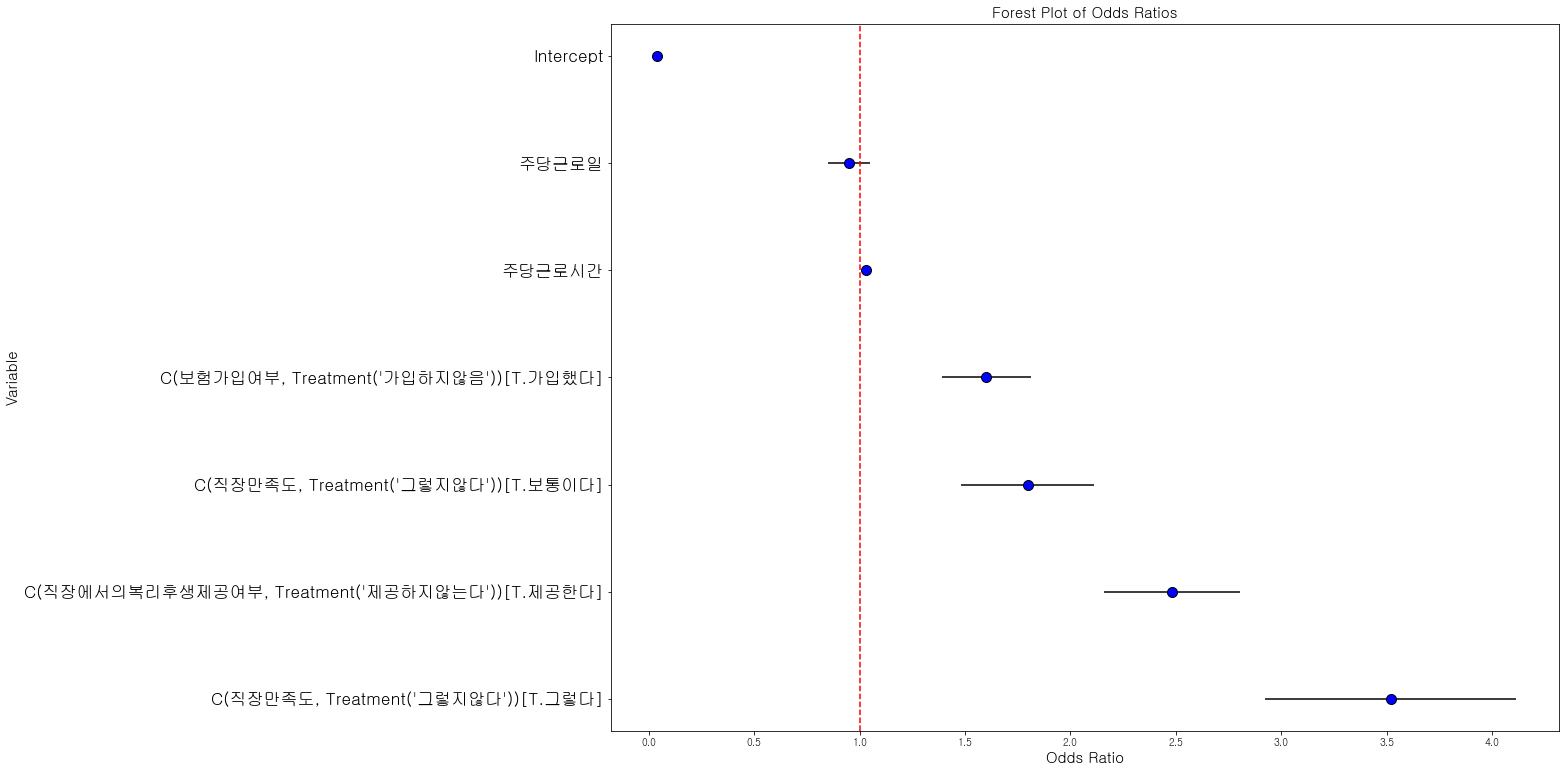

In [9]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black', 
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize=15)

# Show the plot
plt.show()

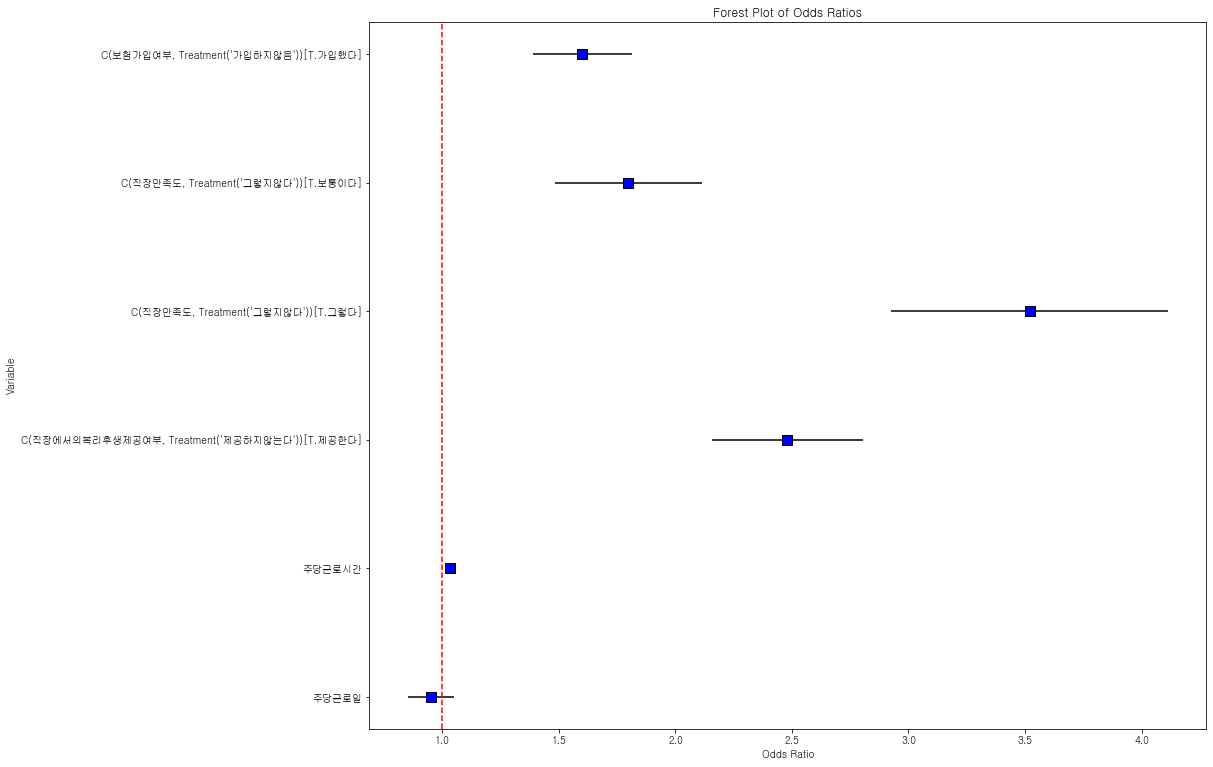

In [22]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['주당근로일', '주당근로시간',
       "C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",
       "C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",
       "C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",
       "C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]"]

# Define the data in the desired order
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in var_order]

# Set the figure size
plt.figure(figsize=(15, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black',
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data])
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Forest Plot of Odds Ratios')

# Show the plot
plt.show()

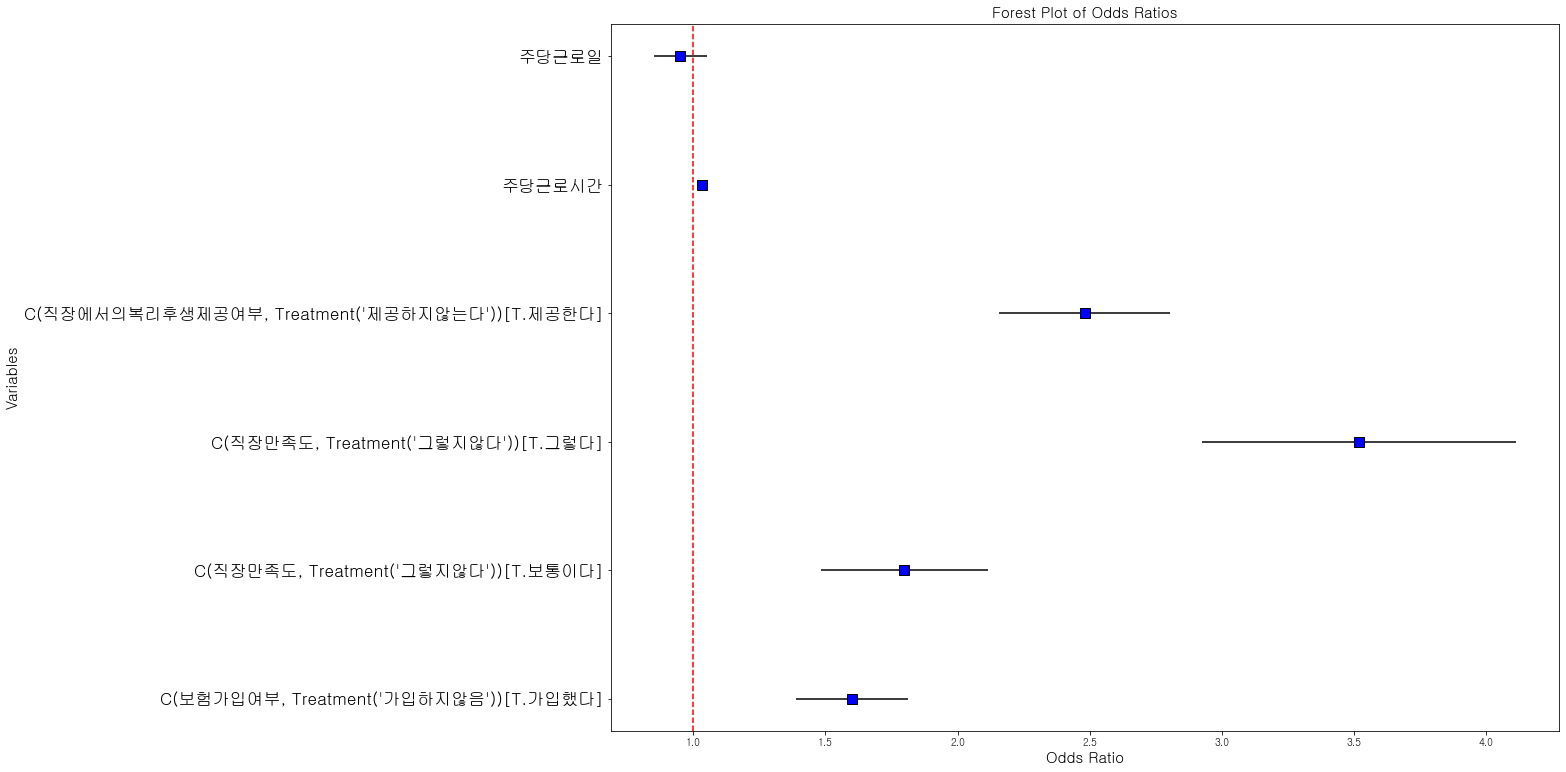

In [21]:
# 테이블 변수 순서대로

# Define the desired order of variables
var_order = ['주당근로일', '주당근로시간',
       "C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",
       "C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",
       "C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",
       "C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]"]

var_order_reversed = var_order[::-1] # 역순 정렬

# Define the data in the desired order
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in var_order_reversed]

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variables', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize= 15)

# Show the plot
plt.show()